##  Flatten FHIR Observations to Panda Dataframe and do some stats on them

1. Fetch a series of FHIR Observations
1. Flatten them and create a Panda Dataframe
1. Perform several stats operations on them

### First lets play with Pandas ...

In [3]:
people = {
    "first": ["Corey", 'Jane', 'John'], 
    "last": ["Schafer", 'Doe', 'Doe'], 
    "email": ["CoreyMSchafer@gmail.com", 'JaneDoe@email.com', 'JohnDoe@email.com'],
'age':[5,9,6]
}

from pathlib import Path 
from json import dumps,loads
from pandas import *

#df = DataFrame(people, index= people['email'])
#df = DataFrame(people)
df = read_excel('uforeports.xlsx')
df.head()

,City,Colors,Shape,State,Time
0,Ithaca,NaN,Triangle,NY,1930-06-01 22:00:00
1,Willingboro,NaN,Other,NJ,1930-06-30 20:00:00
2,Holyhoke,NaN,Oval,CO,1931-02-15 14:00:00
3,Abilene,NaN,Disk,KS,1931-06-01 13:00:00
4,New York,NaN,Light,NY,1933-04-18 19:00:00


### Then you can do all your data analysis...

In [5]:
df.dtypes

City              object
Colors           float64
Shape             object
State             object
Time      datetime64[ns]
dtype: object

In [6]:
df.describe()

,Colors
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [7]:
df.Time.max()

Timestamp('1933-04-18 19:00:00')

In [8]:
%matplotlib inline

In [9]:
df['Year'] = df.Time.dt.year

In [156]:
df

,City,Colors,Shape,State,Time,Year
0,Ithaca,NaN,Triangle,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,Other,NJ,1930-06-30 20:00:00,1930
2,Holyhoke,NaN,Oval,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,Disk,KS,1931-06-01 13:00:00,1931
4,New York,NaN,Light,NY,1933-04-18 19:00:00,1933


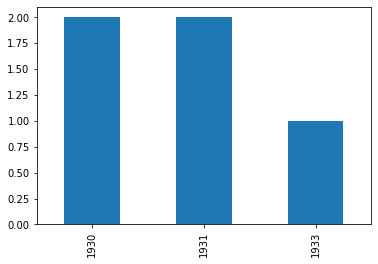

In [160]:
df.Year.value_counts().sort_index().plot.bar()

In [22]:
#df = DataFrame(people, index= people['email'])
df = DataFrame(people)

df.email

0    CoreyMSchafer@gmail.com
1          JaneDoe@email.com
2          JohnDoe@email.com
Name: email, dtype: object

In [23]:
df.set_index('email', inplace=True)
df.index

Index(['CoreyMSchafer@gmail.com', 'JaneDoe@email.com', 'JohnDoe@email.com'], dtype='object', name='email')

In [24]:
df.loc['CoreyMSchafer@gmail.com', 'last']

'Schafer'

In [25]:
my_filter = (df['last'] == "Schafer") | (df['first'] == "John")
df[my_filter]

,first,last,age
email,,,
CoreyMSchafer@gmail.com,Corey,Schafer,5
JohnDoe@email.com,John,Doe,6


In [35]:
df.loc[my_filter].index # list only the indices

Index(['CoreyMSchafer@gmail.com', 'JohnDoe@email.com'], dtype='object', name='email')

In [36]:
df['first']


email
CoreyMSchafer@gmail.com    Corey
JaneDoe@email.com           Jane
JohnDoe@email.com           John
Name: first, dtype: object

In [37]:
df['age'].describe()


count    3.000000
mean     6.666667
std      2.081666
min      5.000000
25%      5.500000
50%      6.000000
75%      7.500000
max      9.000000
Name: age, dtype: float64

In [38]:
df['age'].median(), df['age'].count(),

(6.0, 3)

In [39]:
 df['age'].value_counts()

6    1
9    1
5    1
Name: age, dtype: int64

In [40]:
df.shape[0]

3

In [41]:
my_group=df.groupby(['last'])
my_group

In [42]:
my_group.get_group("Doe") # same as filter my_filter = (df['last'] == "Doe")

,first,last,age
email,,,
JaneDoe@email.com,Jane,Doe,9
JohnDoe@email.com,John,Doe,6


In [43]:
my_group['age'].describe()

,count,mean,std,min,25%,50%,75%,max
last,,,,,,,,
Doe,2.0,7.5,2.12132,6.0,6.75,7.5,8.25,9.0
Schafer,1.0,5.0,NaN,5.0,5.00,5.0,5.00,5.0


In [44]:
my_group['age'].value_counts(normalize=True)

last     age
Doe      6      0.5
         9      0.5
Schafer  5      1.0
Name: age, dtype: float64

In [45]:
my_group['age'].median()

last
Doe        7.5
Schafer    5.0
Name: age, dtype: float64

In [46]:
my_group['age'].agg(['median','mean'])

,median,mean
last,,
Doe,7.5,7.5
Schafer,5.0,5.0
